In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.preprocessing import MinMaxScaler
from time import time
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [50]:
def cfm_plot(y_true,y_pred):
    plt.figure(figsize=(6,6))
    cm = confusion_matrix(y_true,y_pred)
    #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df = pd.DataFrame(cm)
    df = df.applymap(lambda x : round(x,2))
    #plt.imshow(df, cmap='hot', interpolation='nearest')
    sn.heatmap(df,annot = True,annot_kws={"size": 12})
    plt.show()

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape
x_test.shape

(10000, 28, 28)

In [6]:
x_train = x_train.reshape((60000,-1))
print(x_train.shape)

x_test = x_test.reshape((10000,-1))
print(x_test.shape)


(60000, 784)
(10000, 784)


In [7]:
print(x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [10]:
batch_size = 32
es = EarlyStopping(monitor='loss', patience=2, restore_best_weights=True)
callbacks = [es]
model.fit(x_train,y_train,epochs=50, batch_size=batch_size, callbacks=callbacks)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2512 - acc: 0.9243
Epoch 2/50
60000/60000 [==============================] - 6s 94us/sample - loss: 0.1085 - acc: 0.9683
Epoch 3/50
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0797 - acc: 0.9757
Epoch 4/50
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0650 - acc: 0.9812
Epoch 5/50
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0533 - acc: 0.9839
Epoch 6/50
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0449 - acc: 0.9863
Epoch 7/50
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0399 - acc: 0.9880
Epoch 8/50
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0335 - acc: 0.9903
Epoch 9/50
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0320 - acc: 0.9907
Epoch 10/50
60000/60000 [==============================] -

In [11]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 77us/sample - loss: 0.1170 - acc: 0.9780


[0.11699080231709859, 0.978]

[7 2 1 ... 4 5 6]


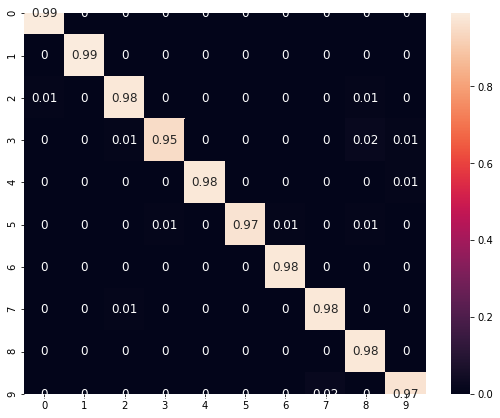

In [12]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
#tensorflow.confusion_matrix(y_test,y_pred)
cfm_plot(y_test,y_pred)

0.5544


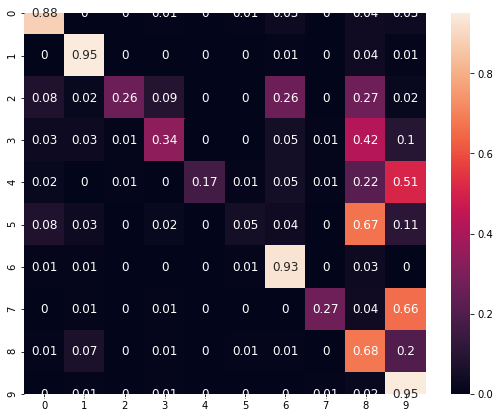

In [13]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
print(accuracy_score(y_test,y_pred))
cfm_plot(y_test,y_pred)

0.9615


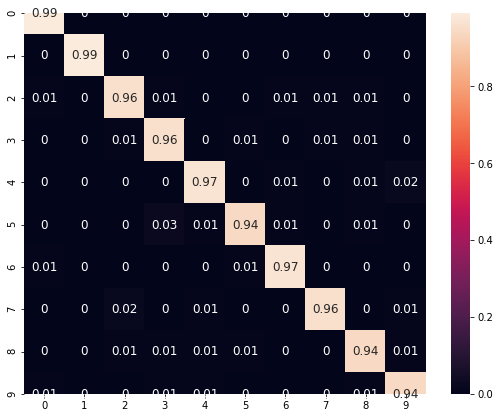

In [14]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
cfm_plot(y_test,y_pred)

In [3]:
df = pd.read_csv('heart.csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

In [4]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]
y 

target
0          0
1          0
2          0
3          0
4          0
...      ...
1020       1
1021       0
1022       0
1023       1
1024       0

[1025 rows x 1 columns]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [20]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

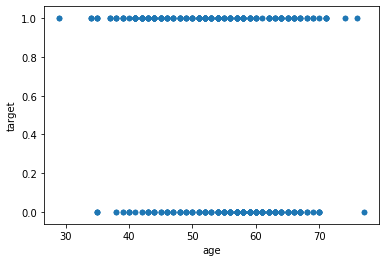

In [21]:
df.plot.scatter(x='age', y='target')

In [22]:
sb = SelectKBest()
x_train = sb.fit_transform(x_train,y_train.values.ravel())
x_test = sb.transform(x_test)

In [26]:
sb.get_support()

array([ True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True])

In [82]:
model = Sequential()

model.add(Dense(10, activation='relu', input_shape=(10,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [83]:
batch_size = 32
es = EarlyStopping(monitor='loss', patience=2, restore_best_weights=True)
callbacks = [es]
model.fit(x_train,y_train,epochs=50, batch_size=batch_size, callbacks=callbacks)

Train on 717 samples
Epoch 1/50
717/717 [==============================] - 0s 525us/sample - loss: 0.7687 - acc: 0.4505
Epoch 2/50
717/717 [==============================] - 0s 103us/sample - loss: 0.7209 - acc: 0.4324
Epoch 3/50
717/717 [==============================] - 0s 97us/sample - loss: 0.6946 - acc: 0.5160
Epoch 4/50
717/717 [==============================] - 0s 106us/sample - loss: 0.6739 - acc: 0.6904
Epoch 5/50
717/717 [==============================] - 0s 110us/sample - loss: 0.6595 - acc: 0.7727
Epoch 6/50
717/717 [==============================] - 0s 99us/sample - loss: 0.6440 - acc: 0.8145
Epoch 7/50
717/717 [==============================] - 0s 99us/sample - loss: 0.6269 - acc: 0.8354
Epoch 8/50
717/717 [==============================] - 0s 104us/sample - loss: 0.6071 - acc: 0.8312
Epoch 9/50
717/717 [==============================] - 0s 102us/sample - loss: 0.5856 - acc: 0.8326
Epoch 10/50
717/717 [==============================] - 0s 103us/sample - loss: 0.5603 - acc

In [84]:
model.evaluate(x_test,y_test)

308/308 [==============================] - 0s 677us/sample - loss: 0.3654 - acc: 0.8247


[0.36538171845597106, 0.8246753]

acc= 0.82
precision= 0.79
[[124  35]
 [ 19 130]]


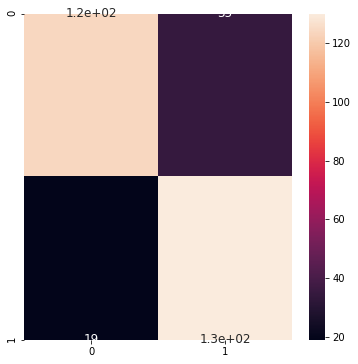

In [86]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print('acc=',round(accuracy_score(y_test,y_pred),2))
print('precision=',round(precision_score(y_test,y_pred),2))
print(confusion_matrix(y_test,y_pred))
cfm_plot(y_test,y_pred)

acc= 0.8
precision= 0.76
[[119  40]
 [ 22 127]]


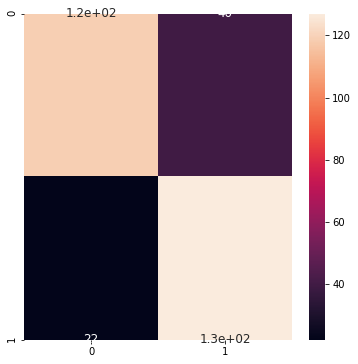

In [52]:
nb = GaussianNB()
nb.fit(x_train,y_train.values.ravel())
y_pred = nb.predict(x_test)
print('acc=',round(accuracy_score(y_test,y_pred),2))
print('precision=',round(precision_score(y_test,y_pred),2))
print(confusion_matrix(y_test,y_pred))
cfm_plot(y_test,y_pred)

acc= 0.98
precision= 1.0
[[159   0]
 [  6 143]]


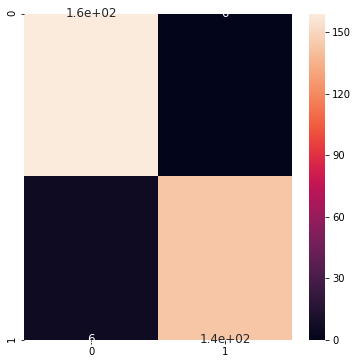

In [58]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train,y_train.values.ravel())
y_pred = rf.predict(x_test)
print('acc=',round(accuracy_score(y_test,y_pred),2))
print('precision=',round(precision_score(y_test,y_pred),2))
print(confusion_matrix(y_test,y_pred))
cfm_plot(y_test,y_pred)